# Data Analysis of Writings and Plain Text Notes Files

A bit of exploritory data analysis my notes data. 

Tracking and data collected using [writing tracker](https://github.com/markwk/writing-tracker/blob/master/writing-tracker.sh). 

------

### Import Libraries

In [1]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

### Import and Process Data

In [2]:
# import collected notes stats
coding = pd.read_csv("data/coder-notes-stats.csv")
coding['date'] = pd.to_datetime(coding['date'])
coding['current_datetime'] = pd.to_datetime(coding['date'])
coding['type'] = 'coding'

project = pd.read_csv("data/project-notes-stats.csv")
project['date'] = pd.to_datetime(project['date'])
project['current_datetime'] = pd.to_datetime(project['date'])
project['type'] = 'project'

writing = pd.read_csv("data/writing-notes-stats.csv")
# drop some imported stuff with no data
writing = writing[writing.date != 'import']
# Remove a few anomoly dates with extreme that is messing up numbers
writing = writing[writing.date != '2018-11-21']
writing = writing[writing.date != '2018-11-28']
writing = writing[writing.date != '2018-12-20']
writing['date'] = pd.to_datetime(writing['date'])
writing['current_datetime'] = pd.to_datetime(writing['date'])
writing['type'] = 'writing'

In [3]:
# combined
notes = pd.concat([writing, project, coding], ignore_index=True, sort=False)

----

## Full Data Analysis

### Month (Future)

In [4]:
# TODO: Once we have more data we should add this dimension and visualize

In [5]:
# month dimension
# coding['mo_num'] = coding['date'].dt.month
# project['mo_num'] = project['date'].dt.month
# writing['mo_num'] = writing['date'].dt.month

### Date

In [6]:
# TODO: Combine All-Type Data by Date 

### Date by Type

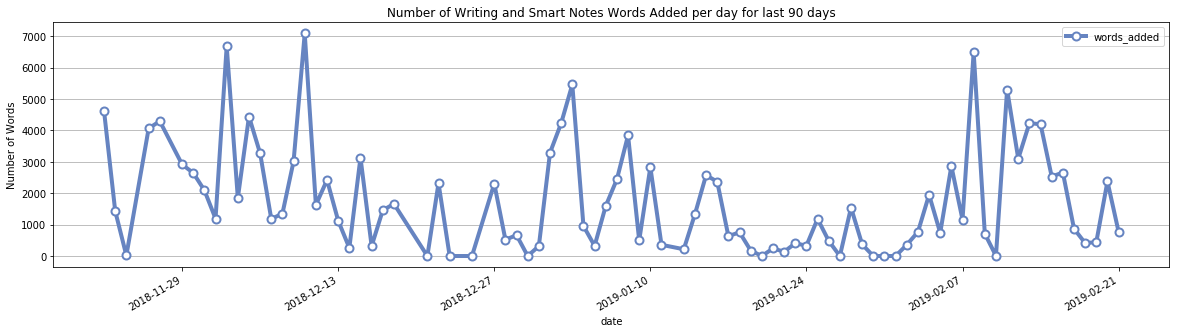

In [7]:
# writing words added
wrt_daily_words_added = writing.groupby(['date'])['words_added'].sum()
wrt_daily_words_added = wrt_daily_words_added.to_frame().reset_index()
wrt_daily_words_added['date'] = pd.to_datetime(wrt_daily_words_added['date'])
wrt_daily_words_added = wrt_daily_words_added.set_index('date')

dataset = wrt_daily_words_added.tail(90)
chart_title = 'Number of Writing and Smart Notes Words Added per day for last 90 days'

ax = dataset.plot(kind='line', figsize=[20, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.set_ylabel('Number of Words')
ax.set_title(chart_title)

plt.show()

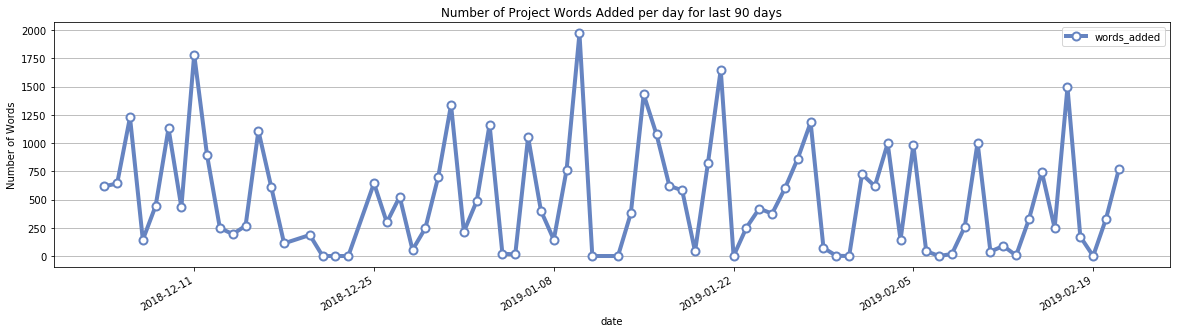

In [8]:
# project words added
proj_daily_words_added = project.groupby(['date'])['words_added'].sum()
proj_daily_words_added = proj_daily_words_added.to_frame().reset_index()
proj_daily_words_added['date'] = pd.to_datetime(proj_daily_words_added['date'])
proj_daily_words_added = proj_daily_words_added.set_index('date')

dataset = proj_daily_words_added.tail(90)
chart_title = 'Number of Project Words Added per day for last 90 days'

ax = dataset.plot(kind='line', figsize=[20, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.set_ylabel('Number of Words')
ax.set_title(chart_title)

plt.show()

### Day of Week

In [9]:
wrt_daily_words_added = writing.groupby(['date'])['words_added'].sum()
wrt_daily_words_added = wrt_daily_words_added.to_frame().reset_index()
wrt_daily_words_added['date'] = pd.to_datetime(wrt_daily_words_added['date'])
wrt_daily_words_added['dow'] = wrt_daily_words_added['date'].dt.weekday

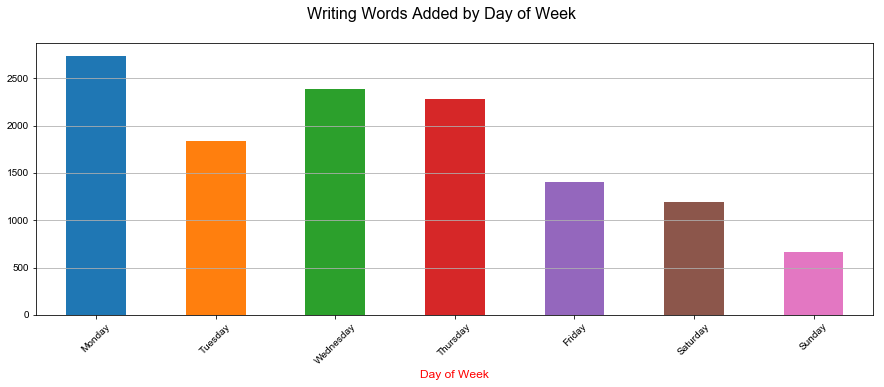

In [10]:
data = wrt_daily_words_added.groupby(['dow'])['words_added'].mean()

fig, ax = plt.subplots(figsize=[15, 5])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.5

ax.yaxis.grid(True)

plt.suptitle('Writing Words Added by Day of Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Day of Week', fontsize=12, color='red')

In [11]:
wrt_daily_files_added = writing.groupby(['date'])['files_added'].sum()
wrt_daily_files_added = wrt_daily_files_added.to_frame().reset_index()
wrt_daily_files_added['date'] = pd.to_datetime(wrt_daily_files_added['date'])
wrt_daily_files_added['dow'] = wrt_daily_files_added['date'].dt.weekday

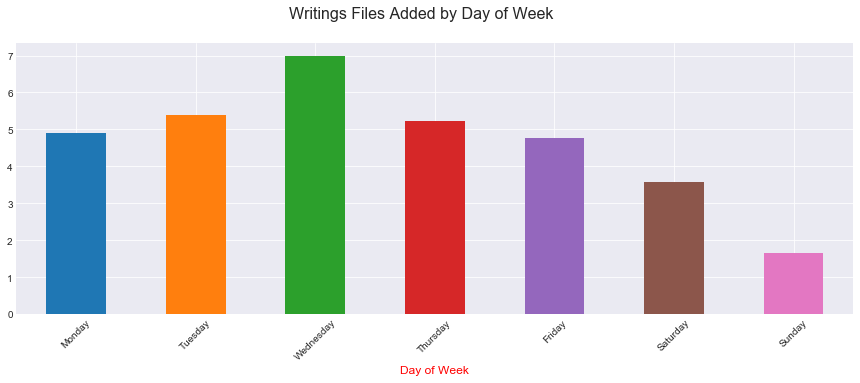

In [12]:
data = wrt_daily_files_added.groupby(['dow'])['files_added'].mean()

fig, ax = plt.subplots(figsize=[15, 5])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.5

ax.yaxis.grid(True)

plt.suptitle('Writings Files Added by Day of Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Day of Week', fontsize=12, color='red')

In [13]:
proj_daily_words_added = project.groupby(['date'])['words_added'].sum()
proj_daily_words_added = proj_daily_words_added.to_frame().reset_index()
proj_daily_words_added['date'] = pd.to_datetime(proj_daily_words_added['date'])
proj_daily_words_added['dow'] = proj_daily_words_added['date'].dt.weekday

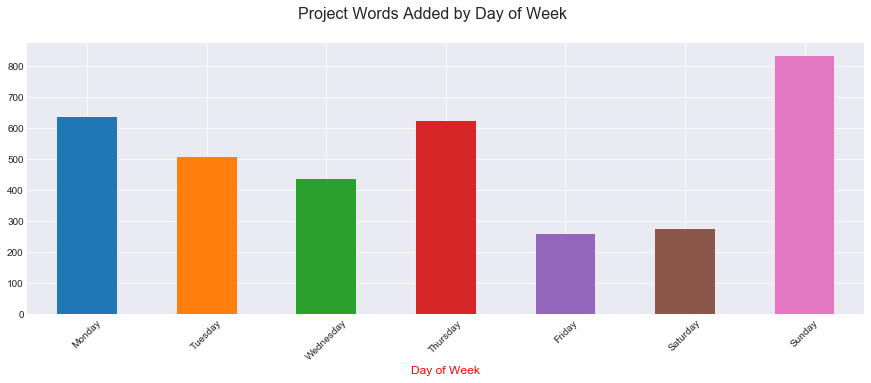

In [14]:
data = proj_daily_words_added.groupby(['dow'])['words_added'].mean()

fig, ax = plt.subplots(figsize=[15, 5])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.5

ax.yaxis.grid(True)

plt.suptitle('Project Words Added by Day of Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Day of Week', fontsize=12, color='red')

In [15]:
proj_daily_files_added = project.groupby(['date'])['files_added'].sum()
proj_daily_files_added = proj_daily_files_added.to_frame().reset_index()
proj_daily_files_added['date'] = pd.to_datetime(proj_daily_files_added['date'])
proj_daily_files_added['dow'] = proj_daily_files_added['date'].dt.weekday

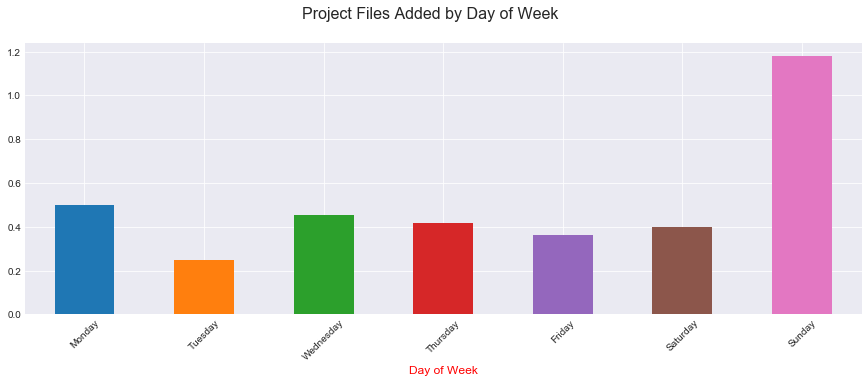

In [16]:
data = proj_daily_files_added.groupby(['dow'])['files_added'].mean()

fig, ax = plt.subplots(figsize=[15, 5])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.5

ax.yaxis.grid(True)

plt.suptitle('Project Files Added by Day of Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Day of Week', fontsize=12, color='red')

In [17]:
proj_daily_files_modified = project.groupby(['date'])['files_modified'].sum()
proj_daily_files_modified = proj_daily_files_modified.to_frame().reset_index()
proj_daily_files_modified['date'] = pd.to_datetime(proj_daily_files_modified['date'])
proj_daily_files_modified['dow'] = proj_daily_files_modified['date'].dt.weekday

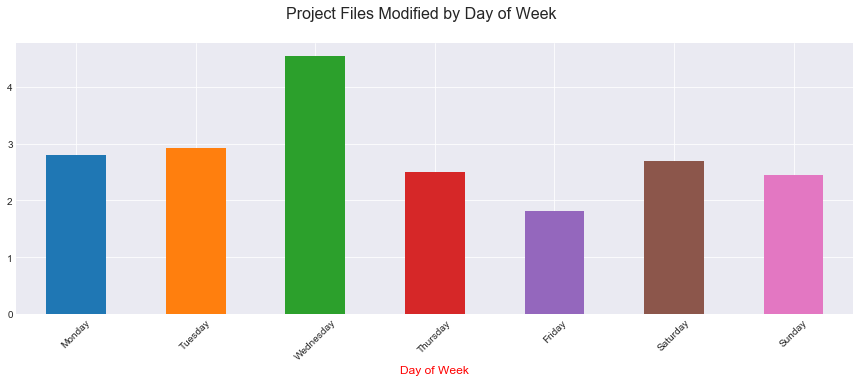

In [18]:
data = proj_daily_files_modified.groupby(['dow'])['files_modified'].mean()

fig, ax = plt.subplots(figsize=[15, 5])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.5

ax.yaxis.grid(True)

plt.suptitle('Project Files Modified by Day of Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Day of Week', fontsize=12, color='red')

-----

# Data Analysis of Note-Taking

In [19]:
notes_usage = notes.groupby(['type'])['words_added'].sum().sort_values(ascending=False)

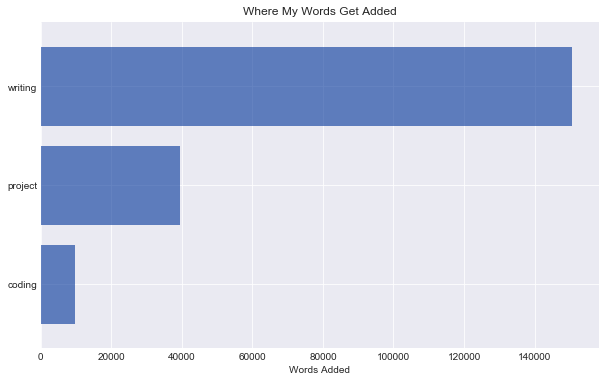

In [20]:
ax = notes_usage.sort_values(ascending=True).tail(5).plot(kind='barh', figsize=[10, 6], width=0.8, alpha=0.6, 
                                    color='#003399', edgecolor=None, zorder=2)
ax.xaxis.grid(True)
ax.set_xlabel('Words Added')
ax.set_ylabel('')
ax.set_title('Where My Words Get Added', y=1.005)

plt.show()

### Note-Taking Behavior by Type

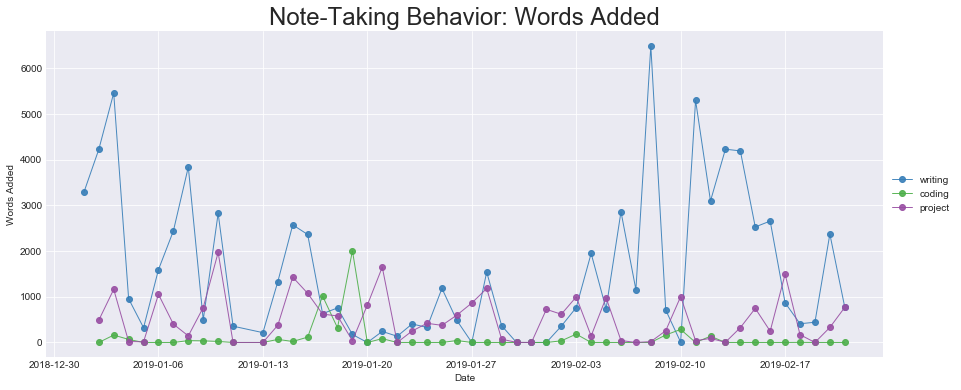

In [21]:
# Note-Taking Behavior: Words Added

# breakdown of type by date
date_notes_usage = notes.groupby(['date', 'type'])['words_added'].sum()
date_notes_usage = date_notes_usage.to_frame().sort_values(by='date')
date_notes_usage.reset_index(inplace=True)  

# Plot Words Added by Type
dataset = date_notes_usage.tail(50*3)

# create a color palette
palette = plt.get_cmap('Set1')

plt.figure(figsize=(15,6)) 

# multiple line plot
num=0
for type in date_notes_usage['type'].unique():
    num+=1
    # print(app)
    plt.plot(dataset[(dataset['type'] == type)]['date'], 
             dataset[(dataset['type'] == type)]['words_added'], 
             marker='o', color=palette(num), linewidth=1, alpha=0.9, label=type)
 
# Add legend
#plt.legend(loc=2, ncol=2)
    
# Add titles
plt.title("Note-Taking Behavior: Words Added", loc='center', fontsize=24, fontweight=0)
plt.xlabel("Date")
plt.ylabel("Words Added")
plt.style.use('seaborn-darkgrid')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

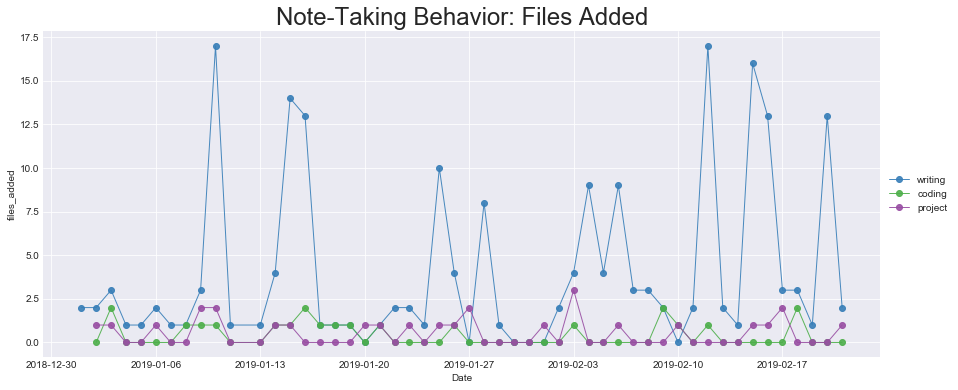

In [22]:
# Note-Taking Behavior: Files Added

# breakdown of type by date
date_notes_usage = notes.groupby(['date', 'type'])['files_added'].sum()
date_notes_usage = date_notes_usage.to_frame().sort_values(by='date')
date_notes_usage.reset_index(inplace=True)  

# Plot Words Added by Type
dataset = date_notes_usage.tail(50*3)

# create a color palette
palette = plt.get_cmap('Set1')

plt.figure(figsize=(15,6)) 

# multiple line plot
num=0
for type in date_notes_usage['type'].unique():
    num+=1
    # print(app)
    plt.plot(dataset[(dataset['type'] == type)]['date'], 
             dataset[(dataset['type'] == type)]['files_added'], 
             marker='o', color=palette(num), linewidth=1, alpha=0.9, label=type)
 
# Add legend
#plt.legend(loc=2, ncol=2)
    
# Add titles
plt.title("Note-Taking Behavior: Files Added", loc='center', fontsize=24, fontweight=0)
plt.xlabel("Date")
plt.ylabel("files_added")
plt.style.use('seaborn-darkgrid')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

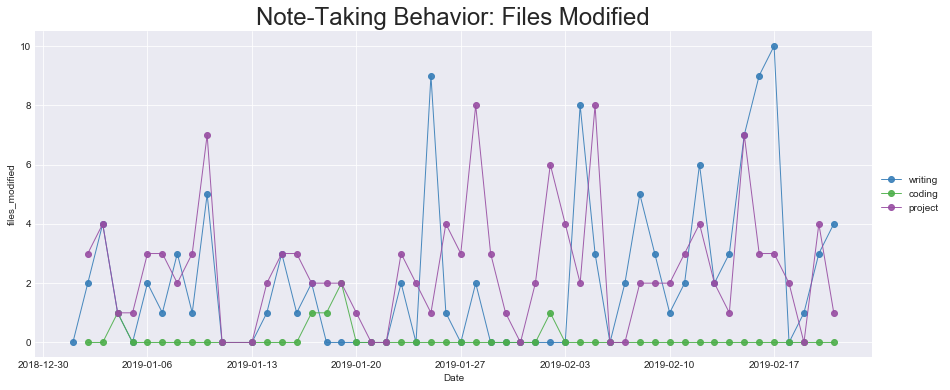

In [23]:
# Note-Taking Behavior: Files Modified
    
# breakdown of type by date
date_notes_usage = notes.groupby(['date', 'type'])['files_modified'].sum()
date_notes_usage = date_notes_usage.to_frame().sort_values(by='date')
date_notes_usage.reset_index(inplace=True)  

# Plot Words Added by Type
dataset = date_notes_usage.tail(50*3)

# create a color palette
palette = plt.get_cmap('Set1')

plt.figure(figsize=(15,6)) 

# multiple line plot
num=0
for type in date_notes_usage['type'].unique():
    num+=1
    # print(app)
    plt.plot(dataset[(dataset['type'] == type)]['date'], 
             dataset[(dataset['type'] == type)]['files_modified'], 
             marker='o', color=palette(num), linewidth=1, alpha=0.9, label=type)
 
# Add legend
#plt.legend(loc=2, ncol=2)
    
# Add titles
plt.title("Note-Taking Behavior: Files Modified", loc='center', fontsize=24, fontweight=0)
plt.xlabel("Date")
plt.ylabel("files_modified")
plt.style.use('seaborn-darkgrid')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()